###keras DNN으로 집값 예측하기

### **1.패키지 수입 및 파라미터 설정**

In [1]:
# 수입
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split

In [2]:
# 파라미터
MY_HIDDEN = 1500
MY_EPOCH = 700
pd.set_option('display.max_columns', None)

### **2. 데이터 처리**

In [3]:
# 데이터 읽기
raw = pd.read_csv('/content/drive/MyDrive/data/housing.csv')

# 데이터 샘플 10개 출력
print(raw.head(10))

# 데이터 통계 출력
print(raw.describe())

# 이 부분 실행은 첨부터 실행해야함.. 이것만 런하면 오류남

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
5   5.

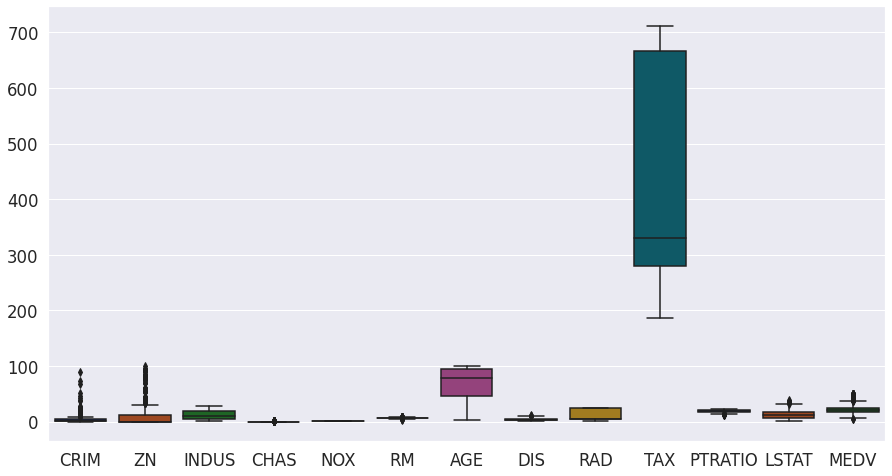

In [4]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)

# boxplot으로 위의 차트를 직관적으로 확인 가능
sns.boxplot(data=raw, palette='dark')


In [5]:
# z-점수 정규화
scaler = StandardScaler()
z_data = scaler.fit_transform(raw)

# 데이터 형식 출력
print(type(raw))
print(type(z_data))

# numpy를 pandas로 재전환
z_data = pd.DataFrame(z_data)
print(type(z_data))

# z-함수 정규화 된 데이터 샘플 출력
print(z_data.head(10))
print(z_data.describe())

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
         0         1         2         3         4         5         6   \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
5 -0.417044 -0.487722 -1.306878 -0.272599 -0.835284  0.207096 -0.351157   
6 -0.410243  0.048772 -0.476654 -0.272599 -0.265154 -0.388411 -0.070229   
7 -0.403696  0.048772 -0.476654 -0.272599 -0.265154 -0.160466  0.978808   
8 -0.395935  0.048772 -0.476654 -0.272599 -0.265154 -0.931206  1.117494   
9 -0.400729  0.048772 -0.476654 -0.272599 -0.265154 -0.399808  0.616090   

         7         8         9         10        11        12  
0  0.14021

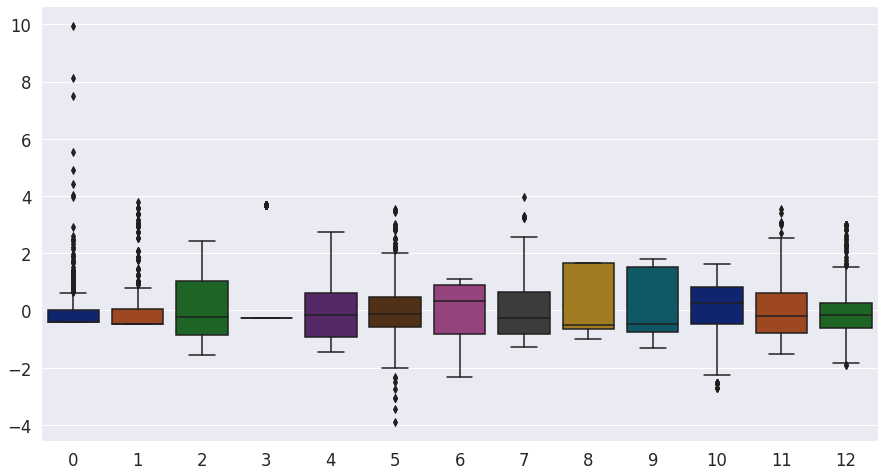

In [6]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)

# boxplot으로 위의 차트를 직관적으로 확인 가능
sns.boxplot(data=z_data, palette='dark')

In [7]:
# 데이터 모양 출력
print('분리 전:', z_data.shape)

# 데이터를 입력과 출력으로 분리
X_data = z_data.drop(12, axis=1)
#X_data = X_data.drop(0, axis=1) : 크라임요소 빼는 거
Y_data = z_data[12]

# 데이터 모양 출력
print('분리 후: ')
print(X_data.shape)
print(Y_data.shape)


분리 전: (506, 13)
분리 후: 
(506, 12)
(506,)


In [8]:
# 데이터 4분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    train_size=0.7)

# 최종 데이터 모양 출력
print('학습용 입력 데이터 모양: ', X_train.shape)
print('학습용 출력 데이터 모양: ', Y_train.shape)
print('평가용 입력 데이터 모양: ', X_test.shape)
print('평가용 출력 데이터 모양: ', Y_test.shape)


학습용 입력 데이터 모양:  (354, 12)
학습용 출력 데이터 모양:  (354,)
평가용 입력 데이터 모양:  (152, 12)
평가용 출력 데이터 모양:  (152,)


### **3. 인공 신경망 구현**

In [9]:
# 왼쪽에서 오른쪽으로 순차적으로 추가되는 신경망 함수
model = Sequential()

input = X_train.shape[1]

# 입력층과 은닉층 1 추가
model.add(Dense(units=MY_HIDDEN,
                input_dim=input,
                activation='relu'))

# 은닉층 2 추가
model.add(Dense(units=MY_HIDDEN,
                activation='relu'))

# 은닉층 3 추가
model.add(Dense(units=600,
                activation='relu'))  #이거 3번 문제

# 은닉층 4 추가
model.add(Dense(units=600,
                activation='relu'))

# 출력층 추가
model.add(Dense(units=1))

print('DNN 요약')
model.summary()

DNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1500)              19500     
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_2 (Dense)              (None, 600)               900600    
_________________________________________________________________
dense_3 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 601       
Total params: 3,532,801
Trainable params: 3,532,801
Non-trainable params: 0
_________________________________________________________________


### **4. 인공 신경망 학습**

In [10]:
# 학습 환경 설정
model.compile(optimizer='sgd',
              loss='msle')

print('학습 시작')
begin = time()

model.fit(x=X_train,
          y=Y_train,
          epochs=MY_EPOCH,
          verbose=0)

end = time()
print('총 학습 시간: {:.2f}초'.format(end - begin))

학습 시작
총 학습 시간: 14.02초


### **5. 인공 신경망 평가**

In [11]:
# 신경망 평가
loss = model.evaluate(x=X_test,
                      y=Y_test,
                      verbose=0)

print('최종 손실값: {:.2f}'.format(loss)) #에러의 제곱
print('최종 손실값: ', loss) #fomating 안한 값

최종 손실값: 0.01
최종 손실값:  0.01261689979583025


In [12]:
print(type(X_test))
print(X_test.iloc[0])
print(X_test.iloc[0])
print(Y_test.iloc[0])


<class 'pandas.core.frame.DataFrame'>
0    -0.407636
1    -0.487722
2     0.401721
3     3.668398
4    -0.040557
5    -0.475315
6     0.897019
7    -0.430562
8    -0.523001
9    -0.785394
10   -0.950402
11    0.738286
Name: 218, dtype: float64
0    -0.407636
1    -0.487722
2     0.401721
3     3.668398
4    -0.040557
5    -0.475315
6     0.897019
7    -0.430562
8    -0.523001
9    -0.785394
10   -0.950402
11    0.738286
Name: 218, dtype: float64
-0.11240803508148016


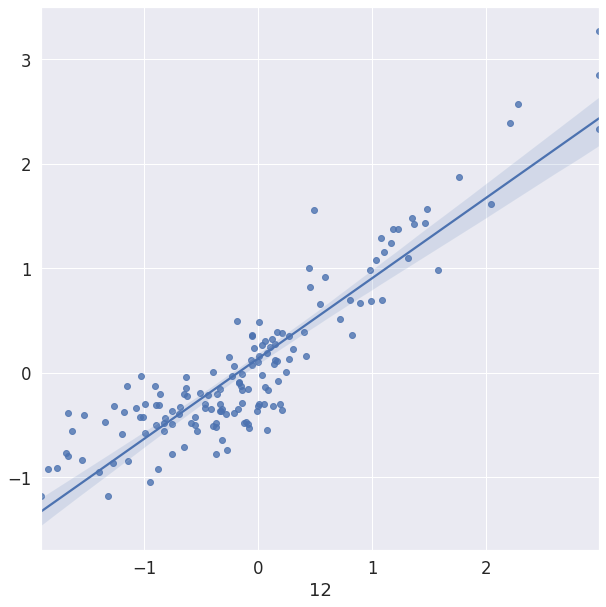

In [13]:
# DNN으로 예측
pred = model.predict(x=X_test)
plt.figure(figsize=(10, 10))

sns.regplot(x=Y_test, y=pred) #Y_test 는 정답, pred는 추측값 서로 비교해서 산포도 보면 비례관계로 나옴
